# Aula 00 - Miguel Angelo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
f = open("./pokemon.csv", encoding="utf-8")

reader = csv.reader(f, delimiter=',', quotechar='"')

# lendo a primeira linha que deve conter o cabeçalho
header = next(reader)

# obtendo um mapa de nomes para índices de colunas
col_id = {}
for i, k in enumerate(header):
    col_id[k] = i

## Fazendo alguma coisa com os dados
Vou usar uma pegada mais funcional por que eu gosto!

In [3]:
col_weight = col_id['weight_kg']

poke_weight_list = reader
poke_weight_list = map    ( lambda x : x[col_weight], poke_weight_list )
poke_weight_list = filter ( lambda x : x != "",       poke_weight_list )
poke_weight_list = map    ( lambda x : float(x),      poke_weight_list )
poke_weight_list = list   (                           poke_weight_list )

print(poke_weight_list)

[6.9, 13.0, 100.0, 8.5, 19.0, 90.5, 9.0, 22.5, 85.5, 2.9, 9.9, 32.0, 3.2, 10.0, 29.5, 1.8, 30.0, 39.5, 2.0, 38.0, 6.9, 65.0, 6.0, 7.0, 20.0, 60.0, 9.0, 19.5, 62.0, 7.5, 40.0, 5.5, 12.0, 7.5, 55.0, 5.4, 8.6, 18.6, 5.4, 29.5, 30.0, 12.5, 19.6, 76.6, 28.0, 32.0, 19.0, 155.0, 12.4, 20.0, 54.0, 19.5, 56.5, 48.0, 19.5, 70.5, 130.0, 4.0, 6.4, 15.5, 45.5, 55.0, 30.0, 95.0, 36.0, 78.5, 6.0, 60.0, 15.0, 39.2, 85.2, 90.0, 120.0, 4.0, 132.5, 0.1, 0.1, 40.5, 210.0, 32.4, 75.6, 6.5, 60.0, 10.4, 66.6, 2.5, 6.5, 49.8, 50.2, 65.5, 1.0, 9.5, 115.0, 120.0, 34.6, 35.0, 80.0, 8.0, 25.0, 15.0, 39.0, 34.5, 80.0, 54.5, 56.0, 40.6, 30.0, 44.5, 55.0, 88.4, 10.0, 235.0, 220.0, 4.0, 6.5, 29.0, 24.5, 25.0, 36.5, 7.5, 35.0, 11.5, 40.5, 59.0, 460.0, 55.4, 52.6, 60.0, 3.3, 16.5, 210.0, 122.0, 4.0, 6.4, 15.8, 100.5, 7.9, 19.0, 79.5, 9.5, 25.0, 88.8, 6.0, 32.5, 21.2, 40.8, 10.8, 35.6, 8.5, 33.5, 75.0, 12.0, 22.5, 2.0, 3.0, 1.0, 1.5, 3.2, 2.0, 15.0, 7.8, 13.3, 61.5, 5.8, 8.5, 28.5, 38.0, 33.9, 0.5, 1.0, 3.0, 11.5, 1.8, 

In [4]:
print("mean:", np.mean(poke_weight_list))

mean: 61.37810499359796


In [5]:
print("std:", np.std(poke_weight_list))

std: 109.28473397573765


## Vou ver o boxplot como fica

{'boxes': [<matplotlib.lines.Line2D at 0x125765d0>],
 'caps': [<matplotlib.lines.Line2D at 0x12576d50>,
 'fliers': [<matplotlib.lines.Line2D at 0x12589510>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x125892d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x12576850>,
  <matplotlib.lines.Line2D at 0x12576ad0>]}

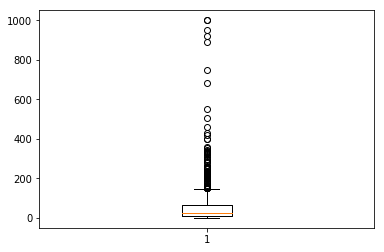

In [6]:
plt.boxplot(poke_weight_list)

## Obtendo a distribuição normal
Não importa qual seja a distribuição, a soma de várias instâncias dessa aleatoriedade vai tender para uma curva normal.

Claro que quanto mais uniforme for a distribuição, mais rápido será a convergência,
ao passo que as menos uniformes poderiam ser entendidas como vários trechinhos
pequenininhos que aproximam uma uniforme só naquele intervalo. Então vai demorar mais,
pois aquela subdistribuição uniforme é pequena em comparação com o todo.

O que eu espero é, por exemplo, que uma distribuição com 4 degraus uniformes e de mesma largura
e alturas variadas,
vá demorar 4 vezes mais para convergir. Pois a chance de cair em cada degrau uniforme é de 1/4,
e para gerar uma normal relativa a cada degrau precisamos de uma certa quantidade de samples.

(array([ 22., 166., 255., 252., 168.,  87.,  31.,  10.,   6.,   2.]),
 array([ 24.51   ,  35.43375,  46.3575 ,  57.28125,  68.205  ,  79.12875,
         90.0525 , 100.97625, 111.9    , 122.82375, 133.7475 ]),
 <a list of 10 Patch objects>)

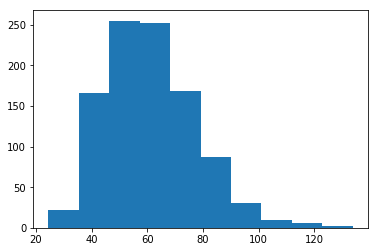

In [15]:
from random import shuffle
list_of_means = []
for i in range(1, 1000):
    shuffle(poke_weight_list)
    mean = np.mean(poke_weight_list[:40])
    list_of_means.append(mean)

plt.hist(list_of_means)

In [8]:
f.close()